In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
if (not os.path.exists('yelp_academic_dataset_business.json')) or (not os.path.exists('yelp_academic_dataset_review.json')):
    kaggle_path = os.path.expanduser('~/.kaggle')
    kaggle_json_path = os.path.join(kaggle_path, 'kaggle.json')
    if not os.path.exists(kaggle_json_path):
        from getpass import getpass
        kaggle_json = getpass('Insert kaggle.json:')
        os.makedirs(kaggle_path, exist_ok=True)
        with open(kaggle_json_path, 'w') as f:
            f.write(kaggle_json)
        os.chmod(kaggle_json_path, 0o600)
    !kaggle datasets download yelp-dataset/yelp-dataset
    !unzip yelp-dataset.zip yelp_academic_dataset_business.json yelp_academic_dataset_review.json
    !rm yelp-dataset.zip

Insert kaggle.json:··········
100% 4.48G/4.48G [01:31<00:00, 51.5MB/s]
100% 4.48G/4.48G [01:31<00:00, 52.6MB/s]
Archive:  yelp-dataset.zip
  inflating: yelp_academic_dataset_business.json  
  inflating: yelp_academic_dataset_review.json  


In [5]:
business_df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
print("The dataset contains total {} businesses".format(len(business_df.index)))

The dataset contains total 209393 businesses


In [6]:
business_df = business_df[business_df['categories'].notna()]
pizza_biz_df = business_df[business_df['categories'].str.contains("Pizza")]
print("Of those, {} businesses sell pizza".format(len(pizza_biz_df.index)))
print("Here are a few examples")
pizza_biz_df.head()

Of those, 7302 businesses sell pizza
Here are a few examples


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
63,ZkzutF0P_u0C0yTulwaHkA,Lelulos Pizzeria,311 Unity Center Rd,Plum,PA,15239,40.489996,-79.779288,4.0,31,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Pizza","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
86,OWkS1FXNJbozn-qPg3LWxg,Mama Napoli Pizza,,Las Vegas,NV,89109,36.128561,-115.171130,4.5,11,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Food, Food Trucks, Restaurants, Pizza",{'Friday': '18:0-0:0'}
105,-C0AlwLuXpcP609madJZQQ,Pizzaville,"1030 Kennedy Circle, Unit 10",Milton,ON,L9T 0J9,43.508962,-79.837990,3.5,7,1,None,"Restaurants, Pizza","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
120,39lLJK_rrYY2NYomSsQdUA,Marco's Pizza,24335 Chagrin Blvd,Beachwood,OH,44122,41.465789,-81.506349,2.5,11,1,"{'RestaurantsDelivery': 'True', 'GoodForKids':...","Restaurants, Pizza",None
126,0y6alZmSLnPzmG5_kP5Quw,J J's Pizza,20542 Lorain Rd,Fairview Park,OH,44126,41.448341,-81.847644,4.5,21,1,"{'NoiseLevel': 'u'quiet'', 'WiFi': ''no'', 'Bu...","Pizza, Italian, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


Here's the distribution of rating count per pizzaria

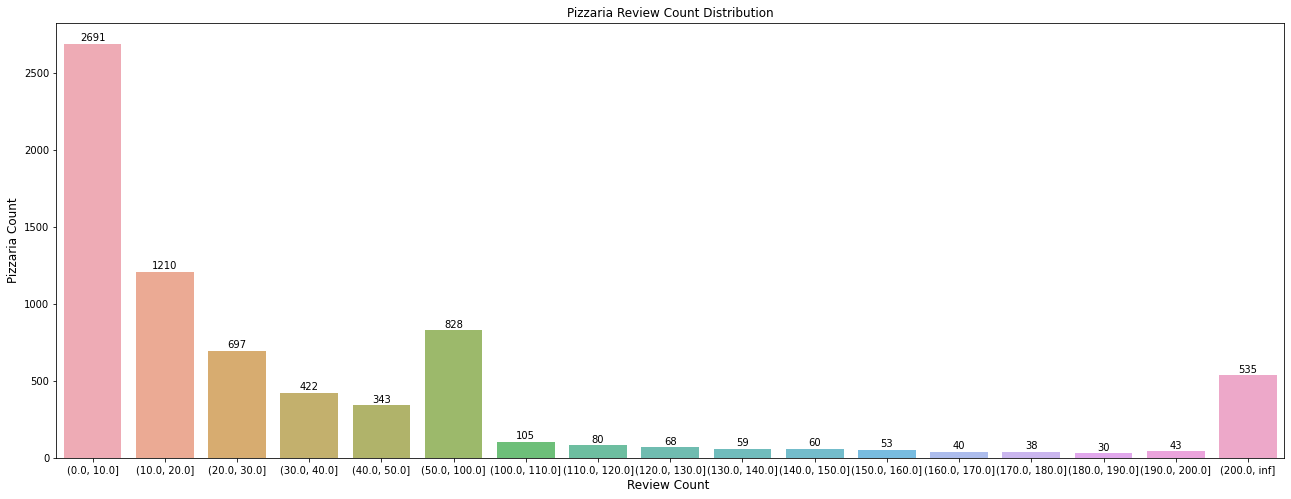

In [7]:
out = pd.cut(pizza_biz_df['review_count'], bins=[0, 10, 20, 30, 40, 50, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, float("inf")])
x= out.value_counts()
x = x.sort_index()
plt.figure(figsize=(22,8))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Pizzaria Review Count Distribution")
plt.ylabel('Pizzaria Count', fontsize=12)
plt.xlabel('Review Count ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

About a third of pizzerias have between 0-10 reviews, which muight cast doubt as to whether those reviews are representative.

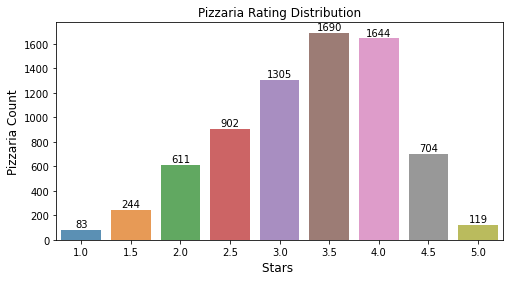

In [21]:
x=pizza_biz_df['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Pizzaria Rating Distribution")
plt.ylabel('Pizzaria Count', fontsize=12)
plt.xlabel('Stars ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

The distribution is generally normal with a slight negative skew.

Online reviewers are a self selecting group. It takes some time and effort to write out a review and upload pictures. Intuitively, customer who feel passionate about thier experience should be more likely to upload a review. It's typical to see an extreme distribution where ratings are bunched really high and really low but not in the middle. Let's look at the score distribution for a few example pizzarias. 

In [11]:
pizza_business_ids = pizza_biz_df.business_id.unique()
pizza_reviews = []
with open('yelp_academic_dataset_review.json', 'r') as f:
    for line in f:
        line_json = json.loads(line)
        if line_json['business_id'] in pizza_business_ids:
            pizza_reviews.append(line_json)

print(pizza_reviews[0])

pic_path = r'/content/drive/My Drive/Data Science Class/review_photos'
review_ids = [f for f in os.listdir(pic_path) if os.path.isdir(os.path.join(pic_path, f))]

#review_df = pd.read_json('yelp_academic_dataset_review.json', lines=True)
#
#lenprint(review_ids)

#reviews_with_pics = review_df[review_df[]]



#reviews_with_pics = pizza_biz_df[pizza_biz_df['business_id'].isin(pizzeria_ids)]
#za_biz_with_pics = za_biz_with_pics[za_biz_with_pics['review_count'] > 5]
#print("Of those, {} businesses are left".format(len(za_biz_with_pics.index)))

{'review_id': 'mM8i91yWP1QbImEvz5ds0w', 'user_id': 'TZQSUDDcA4ek5gBd6BzcjA', 'business_id': 'qUWqjjjfpB2-4P3He5rsKw', 'stars': 4.0, 'useful': 0, 'funny': 0, 'cool': 0, 'text': 'In the heart of Chinatown, I discovered it enroute to Kensington Market one day. It\'s quite hard to see, if you don\'t know it\'s there. First experience was very positive - would definitely return!\n\nATMOSPHERE: Small space. Think Banh Mi Boys, and other trendy over-the-counter eateries. Vibe is casual. Free WiFi is nice.\n\nSERVICE: Okay. Staff does their job, but not overly helpful upon entering the space. Maybe because it\'s an over-the-counter style place, but it would have been nice to be walked through their ordering process and menu.\n\nPRICE: Average. Depends on the size of pizza you order.The small pizza ($7-9.50) is filling for one. Large size pizza ($13-18.50) is good for sharing... or one VERY hungry person.  Pasta portions are very generous for the price tag ($9-14)\n\n\nFOOD: My friends and I we

In [0]:
with open('pizza_reviews.json', 'w') as pr:
  json.dump(pizza_reviews, pr, indent=2)

In [25]:
pic_path = r'/content/drive/My Drive/Data Science Class/review_photos'
pix_review_ids = [f for f in os.listdir(pic_path) if os.path.isdir(os.path.join(pic_path, f))]

pizza_business_with_pix_ids = []
for review in pizza_reviews:
  if review['review_id'] in pix_review_ids: 
    pizza_business_with_pix_ids.append(review['business_id'])
pizza_business_with_pix_ids = set(pizza_business_with_pix_ids)

pizza_biz_pix_df = pizza_biz_df[pizza_biz_df['business_id'].isin(pizza_business_with_pix_ids)]
sort_za = pizza_biz_pix_df.sort_values(by=['review_count'], ascending=False)
example_id = sort_za['business_id'].iloc[0]
print("This is the rating distribution for pizzaria id: {}".format(example_id)) 

This is the rating distribution for pizzaria id: 0FUtlsQrJI7LhqDPxLumEw


In [30]:
# gather reviews
review_df = pd.DataFrame.from_records(pizza_reviews)
pic_review_df = review_df[review_df['business_id'] == example_id]
pic_review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
19,8HE6Wc_A5eHcPGqpeWplvw,I4RpSWfgDSlDZ6DL2FYfiw,0FUtlsQrJI7LhqDPxLumEw,4.0,0,0,0,"Are you looking for an organic, unique, and hi...",2012-06-25 23:41:20
29,fhLlAM-NJUMu6MSvuibOBg,Pwa3X14Olao484xDGJELFw,0FUtlsQrJI7LhqDPxLumEw,5.0,1,0,0,"Holy smokes! I can see driving to Gilbert, AZ...",2011-04-22 02:17:14
36,AXUX4m1lo9hK_Lk64W92-w,EumK5NjRJaO8Gz2PDTlvEw,0FUtlsQrJI7LhqDPxLumEw,3.0,0,0,0,Going a little down hill. Place is getting dat...,2016-08-03 23:48:07
37,sgrWBH4rLE3tLfWtsu5gHA,bGgobkuYRKZAgwg8km83vw,0FUtlsQrJI7LhqDPxLumEw,5.0,1,0,0,A great local place. Good food. Good atmospher...,2018-06-08 23:25:30
61,Z81ZNU-3--n_gJD11aCC9g,4fNHV9nkjf84BmmKiP1Npw,0FUtlsQrJI7LhqDPxLumEw,4.0,0,0,0,"Tough menu. A lot of choices, so I was vacill...",2011-02-13 16:54:56


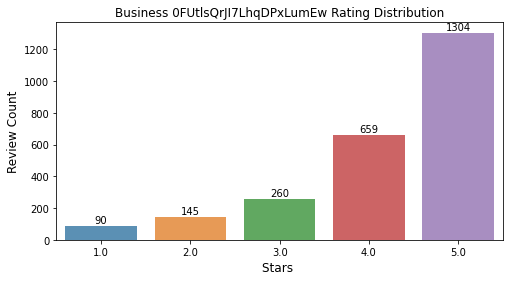

In [32]:
x=pic_review_df['stars'].value_counts()
x=x.sort_index()
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Business {} Rating Distribution".format(example_id))
plt.ylabel('Review Count', fontsize=12)
plt.xlabel('Stars ', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()